<h1><center>Post-Hoc Explanations - Model-Agnostic Approaches</center></h1>
<h1><center>LIME</center></h1>

LIME: a novel explanation technique that explains the predictions of any classifier in an interpretable and faithful manner, by learning an interpretable model locally around the prediction.

In [2]:
from tensorflow.keras.applications import inception_v3
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from keras.applications.imagenet_utils import decode_predictions

classification_model = inception_v3.InceptionV3()

96116736/96112376 [==============================] - 8s 0us/step


In [3]:
dog_image = image.load_img("ChienBasket.jpg", target_size=(299, 299))
dog_image = image.img_to_array(dog_image, dtype="int")

fennec_image = image.load_img("Fennec.jpg", target_size=(299, 299))
fennec_image = image.img_to_array(fennec_image, dtype="int")

icecream_image = image.load_img("Icecream.jpg", target_size=(299, 299))
icecream_image = image.img_to_array(icecream_image, dtype="int")

C:\Users\marco\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:785: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


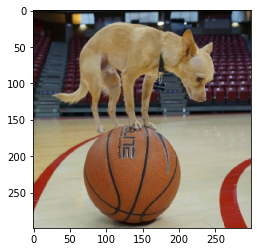

In [4]:
plt.imshow(dog_image)

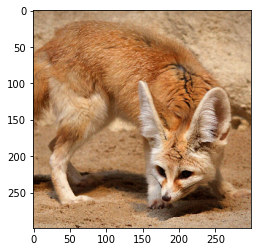

In [5]:
plt.imshow(fennec_image)

In [6]:
def preprocess_img(image_input):
    x = image.img_to_array(image_input)
    x = np.expand_dims(x, axis=0)
    x = inception_v3.preprocess_input(x)
    return x

prepo_dog = preprocess_img(dog_image)
pred_dog = classification_model.predict([prepo_dog])
print("For the dog image: ", decode_predictions(pred_dog), "\n")

prepo_fennec = preprocess_img(fennec_image)
pred_fennec = classification_model.predict([prepo_fennec])
print("For the fennec image: ", decode_predictions(pred_fennec))

40960/35363 [==================================] - 0s 0us/step
For the dog image:  [[('n02802426', 'basketball', 0.99736804), ('n02085620', 'Chihuahua', 0.00014750857), ('n02279972', 'monarch', 8.7266184e-05), ('n02108915', 'French_bulldog', 5.986231e-05), ('n04409515', 'tennis_ball', 3.84019e-05)]] 

For the fennec image:  [[('n02119022', 'red_fox', 0.49598283), ('n02119789', 'kit_fox', 0.3272778), ('n02120505', 'grey_fox', 0.021729406), ('n02115913', 'dhole', 0.005862432), ('n02120079', 'Arctic_fox', 0.003722641)]]


In [7]:
import lime
from lime import lime_image

limeExplainerDog = lime_image.LimeImageExplainer()
explDog = limeExplainerDog.explain_instance(np.array(prepo_dog[0], dtype='double'),
                                      classification_model.predict, top_labels=3, hide_color=0, num_samples=1000)

Explanation for the Basketball label


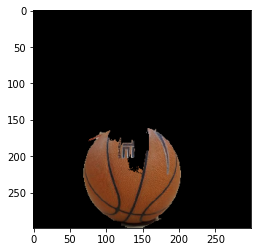

In [8]:
print("Explanation for the Basketball label")
temp, mask = explDog.get_image_and_mask(explDog.top_labels[0], num_features=5)
plt.imshow(mask[:, :, None] * dog_image)

Explanation for the Chihuahua label


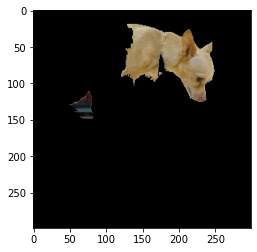

In [9]:
print("Explanation for the Chihuahua label")
temp, mask = explDog.get_image_and_mask(explDog.top_labels[1], num_features=5)
plt.imshow(mask[:, :, None] * dog_image)

Explanation for the Monarch (butterfly) label


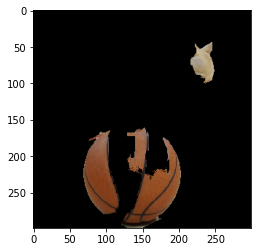

In [10]:
print("Explanation for the Monarch (butterfly) label")
temp, mask = explDog.get_image_and_mask(explDog.top_labels[2], num_features=5)
plt.imshow(mask[:, :, None] * dog_image)

In [11]:
limeExplainerFennec = lime_image.LimeImageExplainer()
explFennec = limeExplainerFennec.explain_instance(np.array(prepo_fennec[0], dtype='double'),
                                                  classification_model.predict, top_labels=3, hide_color=0, num_samples=1000)

Explanation for the Red Fox label


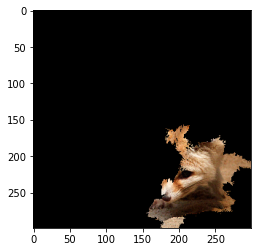

In [12]:
print("Explanation for the Red Fox label")
temp, mask = explFennec.get_image_and_mask(explFennec.top_labels[0], num_features=5)
plt.imshow(mask[:, :, None] * fennec_image)

Explanation for the Kit Fox label


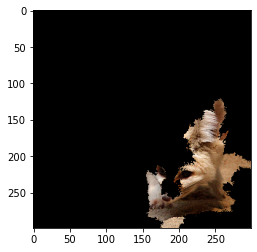

In [13]:
print("Explanation for the Kit Fox label")
temp, mask = explFennec.get_image_and_mask(explFennec.top_labels[1], num_features=5)
plt.imshow(mask[:, :, None] * fennec_image)

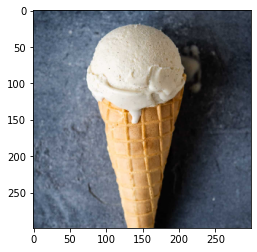

In [14]:
plt.imshow(icecream_image)

In [15]:
prepo_ice = preprocess_img(icecream_image)
pred_ice = classification_model.predict([prepo_ice])
print("For the icecream image: ", decode_predictions(pred_ice), "\n")

For the icecream image:  [[('n07614500', 'ice_cream', 0.9892386), ('n07615774', 'ice_lolly', 0.0025740964), ('n01748264', 'Indian_cobra', 0.00058324926), ('n07836838', 'chocolate_sauce', 0.00031585066), ('n03527444', 'holster', 0.00027978388)]] 



In [18]:
mean = 0.0
std = 40.0
noisy_ice = icecream_image + np.random.normal(mean, std, icecream_image.shape)
noisy_ice = np.array(np.clip(noisy_ice, 0, 255), dtype='int')

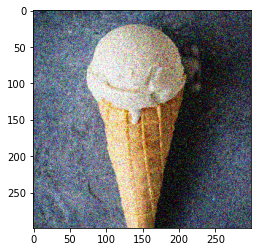

In [19]:
plt.imshow(noisy_ice)

In [20]:
prepo_noice = preprocess_img(noisy_ice)
pred_noice = classification_model.predict([prepo_noice])
print("For the noisy icecream image: ", decode_predictions(pred_noice), "\n")

For the noisy icecream image:  [[('n01748264', 'Indian_cobra', 0.17157806), ('n07614500', 'ice_cream', 0.09155037), ('n04597913', 'wooden_spoon', 0.08718623), ('n03250847', 'drumstick', 0.06786795), ('n03527444', 'holster', 0.024867406)]] 



In [21]:
limeExplainerIce = lime_image.LimeImageExplainer()
explIce = limeExplainerIce.explain_instance(np.array(prepo_noice[0], dtype='double'),
                                      classification_model.predict, top_labels=3, hide_color=0, num_samples=1000)

Explanation for the drumstick label


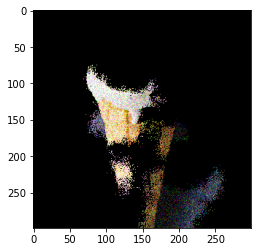

In [22]:
print("Explanation for the drumstick label")
temp, mask = explIce.get_image_and_mask(explIce.top_labels[0], num_features=5)
plt.imshow(mask[:, :, None] * noisy_ice)

Explanation for the wooden spoon label


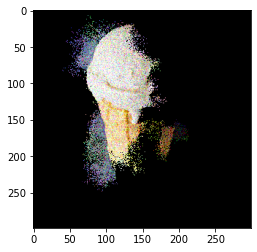

In [23]:
print("Explanation for the wooden spoon label")
temp, mask = explIce.get_image_and_mask(explIce.top_labels[1], num_features=5)
plt.imshow(mask[:, :, None] * noisy_ice)